In [236]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import difflib
import re
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import numpy as np
import pickle
from sklearn import datasets 
from sklearn.metrics import silhouette_score
from IPython.display import IFrame

In [237]:
url ="https://www.billboard.com/charts/hot-100/"

In [238]:
response = requests.get(url)

In [239]:
response.content

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c

In [240]:
response.status_code

200

In [241]:
soup = BeautifulSoup(response.content, "html.parser")

In [242]:
soup

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil

In [243]:
soup.select(".c-label.a-no-trucate") #name of the artist

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Harry Styles
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Jack Harlow
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Glass Animals
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-

In [244]:
soup.select(".c-title.a-no-trucate") #title of the song

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					As It Was		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					First Class		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Heat Waves		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spaci

In [245]:
soup.select(".c-label.a-no-trucate")[0]
soup.select(".c-label.a-no-trucate")[0].get_text().strip()

'Harry Styles'

In [246]:
song= []
artist= []

In [247]:
num_iter = len(soup.select(".c-label.a-no-trucate"))

In [248]:
for i in range(num_iter):
    artist.append(soup.select(".c-label.a-no-trucate")[i].get_text(strip= True)) ## getting artist name
    song.append(soup.select(".c-title.a-no-trucate")[i].get_text(strip= True)) ## getting song name

In [249]:
song

['As It Was',
 'First Class',
 'Heat Waves',
 'Big Energy',
 'Enemy',
 'Stay',
 "Don't Think Jesus",
 'Woman',
 'Super Gremlin',
 'Ghost',
 'Thats What I Want',
 'Bad Habits',
 'abcdefu',
 'Shivers',
 'Cold Heart (PNAU Remix)',
 'Easy On Me',
 'Need To Know',
 'Save Your Tears',
 'One Right Now',
 'In A Minute',
 'Levitating',
 "'Til You Can't",
 'Industry Baby',
 'MAMIII',
 'Bam Bam',
 'Hrs And Hrs',
 "We Don't Talk About Bruno",
 'Right On',
 'Never Say Never',
 "Doin' This",
 'Wasted On You',
 'AA',
 'Good 4 U',
 'Sweetest Pie',
 'Fingers Crossed',
 'I Hate U',
 'Boyfriend',
 'To The Moon!',
 'You Right',
 'Numb Little Bug',
 'Fancy Like',
 'Sand In My Boots',
 'What Happened To Virgil',
 'Pushin P',
 'Beers On Me',
 'The Motto',
 "She's All I Wanna Be",
 "When You're Gone",
 'Buy Dirt',
 'About Damn Time',
 'Shake It',
 'Light Switch',
 'If I Was A Cowboy',
 'Peru',
 'Flowers',
 'Nail Tech',
 'Freaky Deaky',
 '23',
 'Trouble With A Heartbreak',
 'Broadway Girls',
 'Heart On Fire',


In [250]:
for i in range(len(song)):
    song[i] = song[i].lower()
song

['as it was',
 'first class',
 'heat waves',
 'big energy',
 'enemy',
 'stay',
 "don't think jesus",
 'woman',
 'super gremlin',
 'ghost',
 'thats what i want',
 'bad habits',
 'abcdefu',
 'shivers',
 'cold heart (pnau remix)',
 'easy on me',
 'need to know',
 'save your tears',
 'one right now',
 'in a minute',
 'levitating',
 "'til you can't",
 'industry baby',
 'mamiii',
 'bam bam',
 'hrs and hrs',
 "we don't talk about bruno",
 'right on',
 'never say never',
 "doin' this",
 'wasted on you',
 'aa',
 'good 4 u',
 'sweetest pie',
 'fingers crossed',
 'i hate u',
 'boyfriend',
 'to the moon!',
 'you right',
 'numb little bug',
 'fancy like',
 'sand in my boots',
 'what happened to virgil',
 'pushin p',
 'beers on me',
 'the motto',
 "she's all i wanna be",
 "when you're gone",
 'buy dirt',
 'about damn time',
 'shake it',
 'light switch',
 'if i was a cowboy',
 'peru',
 'flowers',
 'nail tech',
 'freaky deaky',
 '23',
 'trouble with a heartbreak',
 'broadway girls',
 'heart on fire',


In [251]:
artist

['Harry Styles',
 'Jack Harlow',
 'Glass Animals',
 'Latto',
 'Imagine Dragons X JID',
 'The Kid LAROI & Justin Bieber',
 'Morgan Wallen',
 'Doja Cat',
 'Kodak Black',
 'Justin Bieber',
 'Lil Nas X',
 'Ed Sheeran',
 'GAYLE',
 'Ed Sheeran',
 'Elton John & Dua Lipa',
 'Adele',
 'Doja Cat',
 'The Weeknd & Ariana Grande',
 'Post Malone & The Weeknd',
 'Lil Baby',
 'Dua Lipa',
 'Cody Johnson',
 'Lil Nas X & Jack Harlow',
 'Becky G X Karol G',
 'Camila Cabello Featuring Ed Sheeran',
 'Muni Long',
 'Carolina Gaitan, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz & Encanto Cast',
 'Lil Baby',
 'Cole Swindell / Lainey Wilson',
 'Luke Combs',
 'Morgan Wallen',
 'Walker Hayes',
 'Olivia Rodrigo',
 'Megan Thee Stallion & Dua Lipa',
 'Lauren Spencer-Smith',
 'SZA',
 'Dove Cameron',
 'JNR CHOI & Sam Tompkins',
 'Doja Cat & The Weeknd',
 'Em Beihold',
 'Walker Hayes',
 'Morgan Wallen',
 'Lil Durk Featuring Gunna',
 'Gunna & Future Featuring Young Thug',
 'Dierks Bentley, BREL

In [252]:
dict ={"song" : song, "artist": artist}

In [253]:
dict

{'song': ['as it was',
  'first class',
  'heat waves',
  'big energy',
  'enemy',
  'stay',
  "don't think jesus",
  'woman',
  'super gremlin',
  'ghost',
  'thats what i want',
  'bad habits',
  'abcdefu',
  'shivers',
  'cold heart (pnau remix)',
  'easy on me',
  'need to know',
  'save your tears',
  'one right now',
  'in a minute',
  'levitating',
  "'til you can't",
  'industry baby',
  'mamiii',
  'bam bam',
  'hrs and hrs',
  "we don't talk about bruno",
  'right on',
  'never say never',
  "doin' this",
  'wasted on you',
  'aa',
  'good 4 u',
  'sweetest pie',
  'fingers crossed',
  'i hate u',
  'boyfriend',
  'to the moon!',
  'you right',
  'numb little bug',
  'fancy like',
  'sand in my boots',
  'what happened to virgil',
  'pushin p',
  'beers on me',
  'the motto',
  "she's all i wanna be",
  "when you're gone",
  'buy dirt',
  'about damn time',
  'shake it',
  'light switch',
  'if i was a cowboy',
  'peru',
  'flowers',
  'nail tech',
  'freaky deaky',
  '23',
 

In [254]:
top100 = pd.DataFrame(dict)

top100

song                    artist
0      as it was              Harry Styles
1    first class               Jack Harlow
2     heat waves             Glass Animals
3     big energy                     Latto
4          enemy     Imagine Dragons X JID
..           ...                       ...
95       p power     Gunna Featuring Drake
96  money so big                      Yeat
97  blick blick!   Coi Leray & Nicki Minaj
98  fall in love          Bailey Zimmerman
99  x ultima vez  Daddy Yankee & Bad Bunny

[100 rows x 2 columns]

In [255]:
def nombre():
    name= input("Write a song: ").lower()
    def mistake(name):
        x= difflib.get_close_matches(name,song,4, 0.8)
        print ("Did you mean: ", x)
    if name in song:
        def selectRandom(song):
            return random.choice(song)
        print ("We recommend you this song: ", selectRandom(song).title())
    else: 
        print ("Sorry, this song is not in the top 100 Billboard list.")

In [256]:
nombre() 

Write a song: Enemy
We recommend you this song:  Never Say Never


In [257]:
name= input("Write a song: ")
x= difflib.get_close_matches(name,song,4, 0.8)
x

Write a song: enemi


['enemy']

In [258]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= "5c473c90dc924221bc335759e24ef9a7",
                                                           client_secret= "25639fd69e584df4a0dae33d60357719"))

In [259]:
results = sp.search(q="Lose yourself",limit=1,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Lose+yourself&type=track&market=GB&offset=0&limit=1',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
       'href': 'https://api.spotify.com/v1/artists/7dGJo4pcD2V6oG8kP0tJRR',
       'id': '7dGJo4pcD2V6oG8kP0tJRR',
       'name': 'Eminem',
       'type': 'artist',
       'uri': 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1rfORa9iYmocEsnnZGMVC4'},
     'href': 'https://api.spotify.com/v1/albums/1rfORa9iYmocEsnnZGMVC4',
     'id': '1rfORa9iYmocEsnnZGMVC4',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273b6ef2ebd34efb08cb76f6eec',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02b6ef2ebd34efb08cb76f6eec',
       'width': 300},
      {'height': 64,
       'url': 'https://i.

In [260]:
list_of_songs=[]
for index in range(0,len(results["tracks"]["items"])):
    list_of_songs.append(sp.audio_features(results["tracks"]["items"][index]["uri"])[0])
pd.DataFrame(list_of_songs)   

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.686   0.735    2    -4.616     1        0.264       0.00921   

   instrumentalness  liveness  valence    tempo            type  \
0           0.00066     0.342   0.0596  171.355  audio_features   

                       id                                   uri  \
0  1v7L65Lzy0j0vdpRjJewt1  spotify:track:1v7L65Lzy0j0vdpRjJewt1   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1v7L65Lzy0j0...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1v7L...       322227   

   time_signature  
0               4

In [261]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [262]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DWWEJlAGA9gs0"

In [263]:
def analyze_playlist(creator, playlist_id):
    
    playlist_features_list = ["artist", "album", "track_name", "track_id", "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "acousticness"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = get_playlist_tracks(creator, playlist_id)
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [264]:
playlist_df = analyze_playlist(playlist_creator, playlist_id)

In [265]:
playlist_df

artist  \
0      Johann Sebastian Bach   
1                  Lang Lang   
2       Ludwig van Beethoven   
3    Berliner Philharmoniker   
4       Sir Neville Marriner   
..                       ...   
143        Jerusalem Quartet   
144                Amy Beach   
145       Anne-Sophie Mutter   
146      Dmitri Shostakovich   
147            Michael Nyman   

                                                 album  \
0                     Bach: Cello Suites Nos. 1, 5 & 6   
1                          Piano Book (Deluxe Edition)   
2       Für Elise, Bagatelle No. 25 in A Minor, WoO 59   
3       Albinoni: Adagio in G minor / Pachelbel: Canon   
4                           Mozart: Academy in Concert   
..                                                 ...   
143                 Smetana & Janáček: String Quartets   
144  Beach: Variations on Balkan Themes Op. 60, Mar...   
145           Tchaikovsky / Korngold: Violin Concertos   
146  Shostakovich: Jazz Suites Nos. 1 - 2 / The Bol...   
147           The Piano: Music From The Motion Picture   

                                            track_name  \
0    Cello Suite No. 1 in G Major, BWV 1007: I. Pré...   
1    The Well-Tempered Clavier: Book 1, BWV 846-869...   
2      Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   
3            Suite No. 3 in D Major, BWV 1068: II. Air   
4    Pachelbel: Canon and Gigue for Three Violins a...   
..                                                 ...   
143  String Quartet No. 1 'Kreutzer Sonata': String...   
144                      Young Birches, Op. 128, No. 2   
145  Violin Concerto in D Major, Op. 35, TH. 59: II...   
146  Tahiti Trot, Op. 16 (orchestral transcription ...   
147                                        The Promise   

                   track_id danceability  energy key loudness mode  \
0    17i5jLpzndlQhbS4SrTd0B        0.275   0.157   7  -18.752    1   
1    4SFBV7SRNG2e2kyL1F6kjU        0.221   0.126   0  -25.427    1   
2    3zLTPuucd3e6TxZnu2dlVS        0.289  0.0306   9   -30.79    0   
3    7h6GoPvGHC9uzZJ8bNvfIq       0.0753    0.07   2  -27.272    1   
4    7B4HbpZCSfLzKGapKzlUPD        0.128   0.132   2   -17.67    1   
..                      ...          ...     ...  ..      ...  ...   
143  5UUNrbwbYIkNshq22NNKrX        0.194   0.101  11  -21.772    1   
144  4VVEfBXep7FdOt524jkfLF         0.24  0.0834   6  -29.545    0   
145  7hOLwSaTSkrqxSMzj4bXI1        0.405   0.318   9   -17.14    1   
146  76i4IBw3KsuDw783tvHB0e        0.291  0.0981   8  -23.156    1   
147  53ann6bENp7BF8uklrzQAp       0.0992   0.226   9   -14.84    0   

    speechiness instrumentalness liveness valence    tempo duration_ms  \
0        0.0636            0.842    0.186   0.304   73.289      152280   
1        0.0447            0.897    0.102   0.216   133.63      139307   
2        0.0446            0.911    0.102   0.118   125.61      212067   
3         0.044            0.947    0.146  0.0625   79.801      365147   
4        0.0353            0.942    0.107  0.0988   85.314      301587   
..          ...              ...      ...     ...      ...         ...   
143       0.048            0.714    0.221   0.074    91.74      266733   
144      0.0499            0.944   0.0804   0.188  169.621      159320   
145      0.0565            0.723    0.284   0.342  151.434      424653   
146      0.0398            0.865    0.275   0.194  138.168      249640   
147      0.0339            0.903    0.183  0.0605   79.518      256493   

    time_signature acousticness  
0                4         0.89  
1                4        0.989  
2                3        0.987  
3                4        0.918  
4                4        0.744  
..             ...          ...  
143              3        0.931  
144              4        0.978  
145              4        0.938  
146              4         0.95  
147              4        0.937  

[148 rows x 17 columns]

In [266]:
classical_essentials = sp.user_playlist_tracks("spotify", "37i9dQZF1DWWEJlAGA9gs0",market="DE")
classical_essentials

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWWEJlAGA9gs0/tracks?offset=0&limit=100&market=DE&additional_types=track',
 'items': [{'added_at': '2022-01-24T10:20:26Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5aIqB5nVVvmFsvSdExz408'},
       'href': 'https://api.spotify.com/v1/artists/5aIqB5nVVvmFsvSdExz408',
       'id': '5aIqB5nVVvmFsvSdExz408',
       'name': 'Johann Sebastian Bach',
       'type': 'artist',
       'uri': 'spotify:artist:5aIqB5nVVvmFsvSdExz408'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/5Dl3HXZjG6ZOWT5cV375lk'},
       'href': 'https://api.spotify.com/v1/artists/5Dl3HXZjG6ZOWT5cV375lk',
       'id': '5Dl3HXZj

In [267]:
playlist_dict = {
    "2000s_150" : ("spotify", "37i9dQZF1DX4o1oenSJRJd"),  
    "80s_150" : ("spotify", "37i9dQZF1DX4UtSsGT1Sbe"),
    "10s_150" : ("spotify", "37i9dQZF1DX5Ejj0EkURtP"), 
    "reggeton_100" : ("spotify", "37i9dQZF1DX8SfyqmSFDwe"),
    "reggeton_66" : ("saul martinez", "04aFzGmPZhi99agYAGqq27"),
    "salsa_90" : ("spotify", "37i9dQZF1DX7SeoIaFyTmA"),
    "jazz_100" : ("spotify", "37i9dQZF1DX71VcjjnyaBQ"),
    "dark_techno_77" : ("moretinmusic", "5YHiYSUfcKgEDv9ZY54mcJ"),
    "rap_50" : ("spotify", "37i9dQZF1DX0XUsuxWHRQd"),
    "rap_89" : ("alphamale21", "0h9Gaqt2sNJ8M5aMV3h9BO"),
    "reggae_110" : ("spotify", "37i9dQZF1DWSiyIBdVQrkk"),
    "rock_80" : ("spotify", "37i9dQZF1DX1spT6G94GFC"),
    "jazz_75" : ("spotify", "37i9dQZF1DX0wgMWPqc1oG"),
    "flamenco_60" :("spotify", "37i9dQZF1DWTfrrcwZAlVH"),
    "flamenco_58" : ("ambiente playlists", "5PSWYGr0adPAwT3yIUAEzK"),
    "metal_150" : ("spotify", "37i9dQZF1DX9qNs32fujYe"),
    "metal_60" : ("spotify", "37i9dQZF1DWXNFSTtym834"),
    "dance_150" : ("spotify", "37i9dQZF1DXaXB8fQg7xif"),
    "dancelatino80s_50" : ("spotify", "37i9dQZF1DWVWEJ7IcHiFv"),
    "folk/indie_265" : ("david vargas", "3IkoDLDrNQR5sARwELyQTv"),
    "hiphop_100" : ("spotify" , "37i9dQZF1DX186v583rmzp"),
    "county_100" : ("spotify", "37i9dQZF1DXaiEFNvQPZrM"),
    "blues_50" : ("spotify" , "37i9dQZF1DXbkKnGZHv1kf"),
    "blues_70" : ("spotify", "37i9dQZF1DXd9rSDyQguIk")


}

In [268]:
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

In [269]:
multiple_playlist_df = analyze_playlist_dict(playlist_dict)

In [270]:
multiple_playlist_df

artist                                              album  \
0          Mary J. Blige                                      No More Drama   
1                50 Cent                             Get Rich Or Die Tryin'   
2              Lady Gaga                                         Just Dance   
3           Gwen Stefani                                   The Sweet Escape   
4                Shakira           Oral Fixation, Vol. 2 (Expanded Edition)   
...                  ...                                                ...   
2388     Various Artists  Alligator Records 50 Years Of Genuine Houseroc...   
2389          Slim Harpo                                 Best Of Slim Harpo   
2390           Magic Sam  The Essential Magic Sam: The Cobra and Chief R...   
2391      Luther Allison                        The Alligator Records Years   
2392  Bobby "Blue" Bland                                            Dreamer   

                                             track_name  \
0                                         Family Affair   
1                                            In Da Club   
2                                            Just Dance   
3                                      The Sweet Escape   
4                    Hips Don't Lie (feat. Wyclef Jean)   
...                                                 ...   
2388                           I'm A Woman - Remastered   
2389                                     I'm A King Bee   
2390                                      All Your Love   
2391                                      Should I Wait   
2392  Ain't No Love In The Heart Of The City - Singl...   

                    track_id danceability energy key loudness mode  \
0     3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551   8    -3.75    0   
1     7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   6   -2.752    0   
2     5vQXxfGn1bjv5WESrYVVpw        0.821  0.741   1    -4.57    0   
3     5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   1   -3.502    1   
4     3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824  10   -5.892    0   
...                      ...          ...    ...  ..      ...  ...   
2388  01noJYGB8kT65mi8Pc2Ola        0.489  0.747  10   -8.295    1   
2389  2uDIGXUD5hLdM7wzyl1PaR        0.693  0.454  10  -10.275    0   
2390  73GEVn1tqk9bn0KbtWsiqj        0.433    0.7  11   -8.197    1   
2391  44s75M70lhq25s3CiW0pxq        0.638  0.738   9   -9.563    1   
2392  4qYHnP5AmKzXbJhciPV8si        0.518  0.376   9  -18.248    0   

     speechiness instrumentalness liveness valence    tempo duration_ms  \
0         0.0449         0.000041   0.0863   0.969   92.887      265867   
1          0.366                0   0.0708   0.777   90.051      193467   
2         0.0313         0.000025     0.19   0.741  118.984      244440   
3         0.0343                0    0.178    0.73  119.961      246467   
4         0.0707                0    0.405   0.758  100.024      218093   
...          ...              ...      ...     ...      ...         ...   
2388       0.101         0.000098   0.0422   0.626  109.799      274440   
2389        0.03         0.000315    0.156   0.914  112.214      183133   
2390       0.163            0.324    0.102     0.8   80.623      176186   
2391      0.0271         0.000634    0.211   0.816  104.098      304600   
2392      0.0431             0.86   0.0976   0.744  158.089      233560   

     time_signature acousticness   playlist  
0                 4        0.132  2000s_150  
1                 4        0.255  2000s_150  
2                 4       0.0278  2000s_150  
3                 4        0.191  2000s_150  
4                 4        0.284  2000s_150  
...             ...          ...        ...  
2388              3       0.0655   blues_70  
2389              4        0.417   blues_70  
2390              4        0.843   blues_70  
2391              3       0.0315   blues_70  
2392              4        0.933   blues_70  

[2393 rows x 18 columns]

In [271]:
multiple_playlist_df["playlist"].value_counts()

folk/indie_265       268
2000s_150            150
10s_150              150
80s_150              150
dance_150            150
metal_150            140
reggae_110           110
reggeton_100         100
county_100           100
jazz_100             100
hiphop_100           100
salsa_90              90
rap_89                89
rock_80               80
dark_techno_77        77
jazz_75               75
blues_70              70
reggeton_66           66
metal_60              60
flamenco_60           60
flamenco_58           58
dancelatino80s_50     50
rap_50                50
blues_50              50
Name: playlist, dtype: int64

In [272]:
multiple_playlist_df_drop= multiple_playlist_df.drop(['artist', 'album', 'track_name', 'track_id', 'playlist','key', 'mode','duration_ms', 'time_signature'], axis = 1) 
multiple_playlist_df_drop

danceability energy loudness speechiness instrumentalness liveness  \
0           0.911  0.551    -3.75      0.0449         0.000041   0.0863   
1           0.899  0.713   -2.752       0.366                0   0.0708   
2           0.821  0.741    -4.57      0.0313         0.000025     0.19   
3           0.756   0.77   -3.502      0.0343                0    0.178   
4           0.778  0.824   -5.892      0.0707                0    0.405   
...           ...    ...      ...         ...              ...      ...   
2388        0.489  0.747   -8.295       0.101         0.000098   0.0422   
2389        0.693  0.454  -10.275        0.03         0.000315    0.156   
2390        0.433    0.7   -8.197       0.163            0.324    0.102   
2391        0.638  0.738   -9.563      0.0271         0.000634    0.211   
2392        0.518  0.376  -18.248      0.0431             0.86   0.0976   

     valence    tempo acousticness  
0      0.969   92.887        0.132  
1      0.777   90.051        0.255  
2      0.741  118.984       0.0278  
3       0.73  119.961        0.191  
4      0.758  100.024        0.284  
...      ...      ...          ...  
2388   0.626  109.799       0.0655  
2389   0.914  112.214        0.417  
2390     0.8   80.623        0.843  
2391   0.816  104.098       0.0315  
2392   0.744  158.089        0.933  

[2393 rows x 9 columns]

In [274]:
scaler = StandardScaler()
scaler.fit(multiple_playlist_df_drop)
audio_features_scaled = scaler.transform(multiple_playlist_df_drop)
audio_features_scaled_df = pd.DataFrame(audio_features_scaled, columns = multiple_playlist_df_drop.columns)
display(multiple_playlist_df_drop.head())

print()
display(audio_features_scaled_df.head())

danceability energy loudness speechiness instrumentalness liveness valence  \
0        0.911  0.551    -3.75      0.0449         0.000041   0.0863   0.969   
1        0.899  0.713   -2.752       0.366                0   0.0708   0.777   
2        0.821  0.741    -4.57      0.0313         0.000025     0.19   0.741   
3        0.756   0.77   -3.502      0.0343                0    0.178    0.73   
4        0.778  0.824   -5.892      0.0707                0    0.405   0.758   

     tempo acousticness  
0   92.887        0.132  
1   90.051        0.255  
2  118.984       0.0278  
3  119.961        0.191  
4  100.024        0.284

danceability    energy  loudness  speechiness  instrumentalness  liveness  \
0      1.831907 -0.423986  1.056078    -0.493325         -0.426898 -0.626506   
1      1.756622  0.291010  1.302713     3.066794         -0.427065 -0.737460   
2      1.267271  0.414589  0.853433    -0.644112         -0.426963  0.115812   
3      0.859478  0.542582  1.117366    -0.610850         -0.427065  0.029912   
4      0.997500  0.780914  0.526728    -0.207274         -0.427065  1.654852   

    valence     tempo  acousticness  
0  1.688841 -0.914263     -0.529082  
1  0.938925 -1.015585     -0.147864  
2  0.798316  0.018112     -0.852032  
3  0.755352  0.053018     -0.346221  
4  0.864715 -0.659277     -0.057983

In [275]:
audio_features_scaled_df.describe()

danceability        energy      loudness   speechiness  \
count  2.393000e+03  2.393000e+03  2.393000e+03  2.393000e+03   
mean  -9.700649e-16 -2.732643e-16 -1.484628e-18  1.781553e-16   
std    1.000209e+00  1.000209e+00  1.000209e+00  1.000209e+00   
min   -3.230996e+00 -2.771111e+00 -4.444024e+00 -7.394624e-01   
25%   -7.089555e-01 -6.534901e-01 -5.406217e-01 -5.875669e-01   
50%    8.153494e-02  1.762572e-01  2.773751e-01 -4.389976e-01   
75%    7.779194e-01  7.809135e-01  7.360465e-01  9.984326e-02   
max    2.233426e+00  1.540044e+00  1.948214e+00  7.224517e+00   

       instrumentalness      liveness       valence         tempo  \
count      2.393000e+03  2.393000e+03  2.393000e+03  2.393000e+03   
mean       4.375940e-16  7.195804e-17 -2.041363e-18 -2.199105e-16   
std        1.000209e+00  1.000209e+00  1.000209e+00  1.000209e+00   
min       -4.270651e-01 -1.101819e+00 -1.975199e+00 -2.508021e+00   
25%       -4.270651e-01 -6.086105e-01 -8.147831e-01 -8.036866e-01   
50%       -4.267771e-01 -3.852708e-01  6.011812e-02 -5.112717e-02   
75%       -3.580149e-01  3.019285e-01  8.373741e-01  5.408381e-01   
max        3.508795e+00  5.241173e+00  1.739616e+00  3.413669e+00   

       acousticness  
count  2.393000e+03  
mean  -1.925376e-16  
std    1.000209e+00  
min   -9.381903e-01  
25%   -8.607106e-01  
50%   -4.453997e-01  
75%    8.191291e-01  
max    2.148744e+00

In [278]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(audio_features_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [279]:
kmeans.labels_

array([1, 5, 1, ..., 3, 1, 4], dtype=int32)

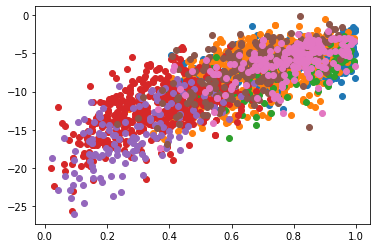

In [280]:
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(multiple_playlist_df_drop.to_numpy()[row_ix, 1], multiple_playlist_df_drop.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [281]:
clusters = kmeans.predict(audio_features_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    466
1    756
2    124
3    440
4    145
5    268
6    194
dtype: int64

In [282]:
multiple_playlist_df["cluster"] = clusters
multiple_playlist_df

artist                                              album  \
0          Mary J. Blige                                      No More Drama   
1                50 Cent                             Get Rich Or Die Tryin'   
2              Lady Gaga                                         Just Dance   
3           Gwen Stefani                                   The Sweet Escape   
4                Shakira           Oral Fixation, Vol. 2 (Expanded Edition)   
...                  ...                                                ...   
2388     Various Artists  Alligator Records 50 Years Of Genuine Houseroc...   
2389          Slim Harpo                                 Best Of Slim Harpo   
2390           Magic Sam  The Essential Magic Sam: The Cobra and Chief R...   
2391      Luther Allison                        The Alligator Records Years   
2392  Bobby "Blue" Bland                                            Dreamer   

                                             track_name  \
0                                         Family Affair   
1                                            In Da Club   
2                                            Just Dance   
3                                      The Sweet Escape   
4                    Hips Don't Lie (feat. Wyclef Jean)   
...                                                 ...   
2388                           I'm A Woman - Remastered   
2389                                     I'm A King Bee   
2390                                      All Your Love   
2391                                      Should I Wait   
2392  Ain't No Love In The Heart Of The City - Singl...   

                    track_id danceability energy key loudness mode  \
0     3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551   8    -3.75    0   
1     7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   6   -2.752    0   
2     5vQXxfGn1bjv5WESrYVVpw        0.821  0.741   1    -4.57    0   
3     5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   1   -3.502    1   
4     3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824  10   -5.892    0   
...                      ...          ...    ...  ..      ...  ...   
2388  01noJYGB8kT65mi8Pc2Ola        0.489  0.747  10   -8.295    1   
2389  2uDIGXUD5hLdM7wzyl1PaR        0.693  0.454  10  -10.275    0   
2390  73GEVn1tqk9bn0KbtWsiqj        0.433    0.7  11   -8.197    1   
2391  44s75M70lhq25s3CiW0pxq        0.638  0.738   9   -9.563    1   
2392  4qYHnP5AmKzXbJhciPV8si        0.518  0.376   9  -18.248    0   

     speechiness instrumentalness liveness valence    tempo duration_ms  \
0         0.0449         0.000041   0.0863   0.969   92.887      265867   
1          0.366                0   0.0708   0.777   90.051      193467   
2         0.0313         0.000025     0.19   0.741  118.984      244440   
3         0.0343                0    0.178    0.73  119.961      246467   
4         0.0707                0    0.405   0.758  100.024      218093   
...          ...              ...      ...     ...      ...         ...   
2388       0.101         0.000098   0.0422   0.626  109.799      274440   
2389        0.03         0.000315    0.156   0.914  112.214      183133   
2390       0.163            0.324    0.102     0.8   80.623      176186   
2391      0.0271         0.000634    0.211   0.816  104.098      304600   
2392      0.0431             0.86   0.0976   0.744  158.089      233560   

     time_signature acousticness   playlist  cluster  
0                 4        0.132  2000s_150        1  
1                 4        0.255  2000s_150        5  
2                 4       0.0278  2000s_150        1  
3                 4        0.191  2000s_150        1  
4                 4        0.284  2000s_150        6  
...             ...          ...        ...      ...  
2388              3       0.0655   blues_70        0  
2389              4        0.417   blues_70        1  
2390              4        0.843   blues_70        3  
2391              3       0.0315   blues_70        1  
2392         

In [283]:
multiple_playlist_df_= multiple_playlist_df.set_index("track_id")

multiple_playlist_df_

artist  \
track_id                                     
3aw9iWUQ3VrPQltgwvN9Xu       Mary J. Blige   
7iL6o9tox1zgHpKUfh9vuC             50 Cent   
5vQXxfGn1bjv5WESrYVVpw           Lady Gaga   
5BHtT1xpC44pGy1J7RKY4T        Gwen Stefani   
3ZFTkvIE7kyPt6Nu3PEa7V             Shakira   
...                                    ...   
01noJYGB8kT65mi8Pc2Ola     Various Artists   
2uDIGXUD5hLdM7wzyl1PaR          Slim Harpo   
73GEVn1tqk9bn0KbtWsiqj           Magic Sam   
44s75M70lhq25s3CiW0pxq      Luther Allison   
4qYHnP5AmKzXbJhciPV8si  Bobby "Blue" Bland   

                                                                    album  \
track_id                                                                    
3aw9iWUQ3VrPQltgwvN9Xu                                      No More Drama   
7iL6o9tox1zgHpKUfh9vuC                             Get Rich Or Die Tryin'   
5vQXxfGn1bjv5WESrYVVpw                                         Just Dance   
5BHtT1xpC44pGy1J7RKY4T                                   The Sweet Escape   
3ZFTkvIE7kyPt6Nu3PEa7V           Oral Fixation, Vol. 2 (Expanded Edition)   
...                                                                   ...   
01noJYGB8kT65mi8Pc2Ola  Alligator Records 50 Years Of Genuine Houseroc...   
2uDIGXUD5hLdM7wzyl1PaR                                 Best Of Slim Harpo   
73GEVn1tqk9bn0KbtWsiqj  The Essential Magic Sam: The Cobra and Chief R...   
44s75M70lhq25s3CiW0pxq                        The Alligator Records Years   
4qYHnP5AmKzXbJhciPV8si                                            Dreamer   

                                                               track_name  \
track_id                                                                    
3aw9iWUQ3VrPQltgwvN9Xu                                      Family Affair   
7iL6o9tox1zgHpKUfh9vuC                                         In Da Club   
5vQXxfGn1bjv5WESrYVVpw                                         Just Dance   
5BHtT1xpC44pGy1J7RKY4T                                   The Sweet Escape   
3ZFTkvIE7kyPt6Nu3PEa7V                 Hips Don't Lie (feat. Wyclef Jean)   
...                                                                   ...   
01noJYGB8kT65mi8Pc2Ola                           I'm A Woman - Remastered   
2uDIGXUD5hLdM7wzyl1PaR                                     I'm A King Bee   
73GEVn1tqk9bn0KbtWsiqj                                      All Your Love   
44s75M70lhq25s3CiW0pxq                                      Should I Wait   
4qYHnP5AmKzXbJhciPV8si  Ain't No Love In The Heart Of The City - Singl...   

                       danceability energy key loudness mode speechiness  \
track_id                                                                   
3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551   8    -3.75    0      0.0449   
7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   6   -2.752    0       0.366   
5vQXxfGn1bjv5WESrYVVpw        0.821  0.741   1    -4.57    0      0.0313   
5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   1   -3.502    1      0.0343   
3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824  10   -5.892    0      0.0707   
...                             ...    ...  ..      ...  ...         ...   
01noJYGB8kT65mi8Pc2Ola        0.489  0.747  10   -8.295    1       0.101   
2uDIGXUD5hLdM7wzyl1PaR        0.693  0.454  10  -10.275    0        0.03   
73GEVn1tqk9bn0KbtWsiqj        0.433    0.7  11   -8.197    1       0.163   
44s75M70lhq25s3CiW0pxq        0.638  0.738   9   -9.563    1      0.0271   
4qYHnP5AmKzXbJhciPV8si        0.518  0.376   9  -18.248    0      0.0431   

                       instrumentalness liveness valence    tempo duration_ms  \
track_id                                                                        
3aw9iWUQ3VrPQltgwvN9Xu         0.000041   0.0863   0.969   92.887      265867   
7iL6o9tox1zgHpKUfh9vuC                0   0.0708   0.777   90.051      193467   
5vQXxfGn1bjv5WESrYVVpw         0.000025     0.19   0.741  118.984      244440   
5BHtT1xpC44pGy1J7RKY4T                0

In [285]:
#multiple_playlist_df_ = multiple_playlist_df_.drop(multiple_playlist_df_.columns[-1],axis=1)
multiple_playlist_df_= multiple_playlist_df_.drop(['mode'], axis = 1)
multiple_playlist_df_

danceability energy loudness speechiness  \
track_id                                                          
3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551    -3.75      0.0449   
7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   -2.752       0.366   
5vQXxfGn1bjv5WESrYVVpw        0.821  0.741    -4.57      0.0313   
5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   -3.502      0.0343   
3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824   -5.892      0.0707   
...                             ...    ...      ...         ...   
01noJYGB8kT65mi8Pc2Ola        0.489  0.747   -8.295       0.101   
2uDIGXUD5hLdM7wzyl1PaR        0.693  0.454  -10.275        0.03   
73GEVn1tqk9bn0KbtWsiqj        0.433    0.7   -8.197       0.163   
44s75M70lhq25s3CiW0pxq        0.638  0.738   -9.563      0.0271   
4qYHnP5AmKzXbJhciPV8si        0.518  0.376  -18.248      0.0431   

                       instrumentalness liveness valence    tempo  \
track_id                                                            
3aw9iWUQ3VrPQltgwvN9Xu         0.000041   0.0863   0.969   92.887   
7iL6o9tox1zgHpKUfh9vuC                0   0.0708   0.777   90.051   
5vQXxfGn1bjv5WESrYVVpw         0.000025     0.19   0.741  118.984   
5BHtT1xpC44pGy1J7RKY4T                0    0.178    0.73  119.961   
3ZFTkvIE7kyPt6Nu3PEa7V                0    0.405   0.758  100.024   
...                                 ...      ...     ...      ...   
01noJYGB8kT65mi8Pc2Ola         0.000098   0.0422   0.626  109.799   
2uDIGXUD5hLdM7wzyl1PaR         0.000315    0.156   0.914  112.214   
73GEVn1tqk9bn0KbtWsiqj            0.324    0.102     0.8   80.623   
44s75M70lhq25s3CiW0pxq         0.000634    0.211   0.816  104.098   
4qYHnP5AmKzXbJhciPV8si             0.86   0.0976   0.744  158.089   

                       acousticness  cluster  
track_id                                      
3aw9iWUQ3VrPQltgwvN9Xu        0.132        1  
7iL6o9tox1zgHpKUfh9vuC        0.255        5  
5vQXxfGn1bjv5WESrYVVpw       0.0278        1  
5BHtT1xpC44pGy1J7RKY4T        0.191        1  
3ZFTkvIE7kyPt6Nu3PEa7V        0.284        6  
...                             ...      ...  
01noJYGB8kT65mi8Pc2Ola       0.0655        0  
2uDIGXUD5hLdM7wzyl1PaR        0.417        1  
73GEVn1tqk9bn0KbtWsiqj        0.843        3  
44s75M70lhq25s3CiW0pxq       0.0315        1  
4qYHnP5AmKzXbJhciPV8si        0.933        4  

[2393 rows x 10 columns]

In [286]:
kmeans.inertia_

9973.042666086038

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

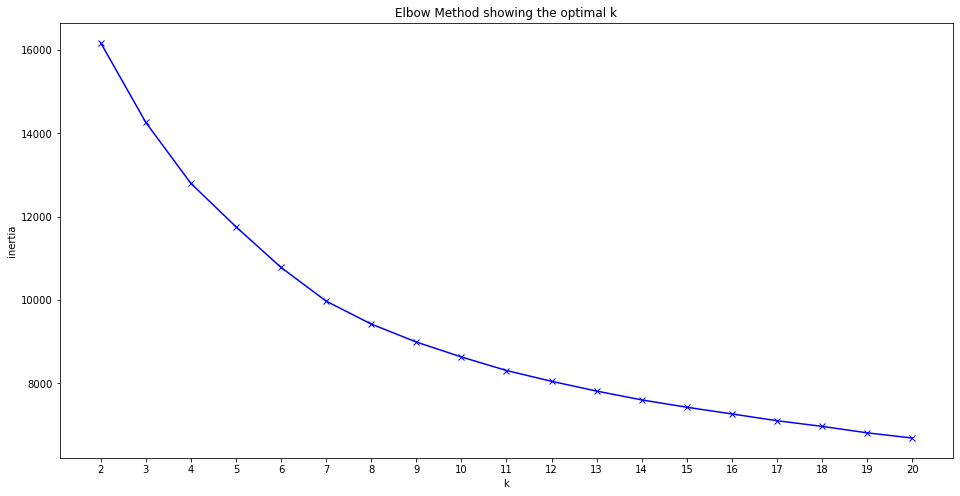

In [287]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

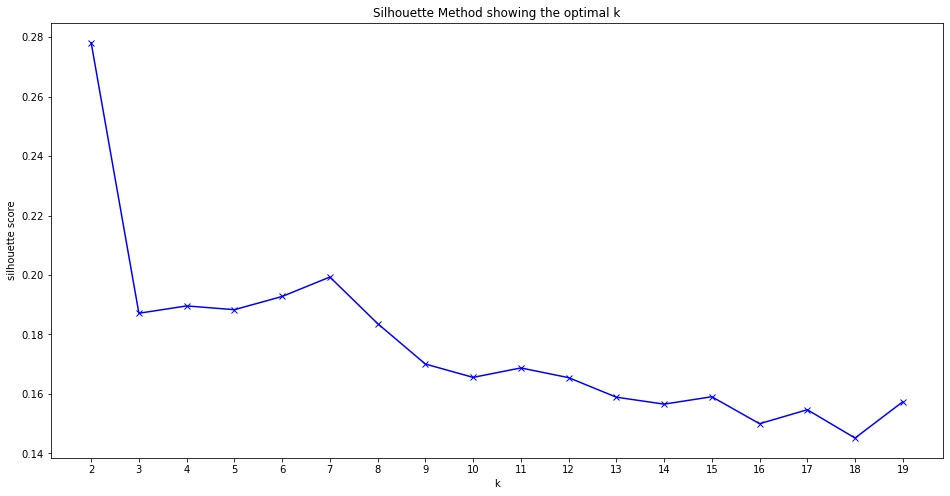

In [346]:
K = range(2, 20)
silhouette = []


for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled_df, kmeans.predict(audio_features_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [342]:
#with open("Model/scaler.pickle", "wb") as f:
 #   pickle.dump(scaler,f)

#with open("Model/kmeans_7.pickle", "wb") as f:
   # pickle.dump(kmeans,f)

In [343]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [347]:
scaler2 = load("Model/scaler.pickle")
kmeans = load("Model/kmeans_7.pickle")

In [348]:
kmeans

KMeans(n_clusters=7, random_state=1234)

In [ ]:
#mistaken word
#def mistake(name):
        #x= difflib.get_close_matches(name,song,4, 0.8)
        #print ("Did you mean: ", x)

In [305]:
#multiple_playlist_df_drop.insert(0,column = "track_id", value = multiple_playlist_df["track_id"])
#multiple_playlist_df_drop=multiple_playlist_df_drop.set_index("track_id")
#multiple_playlist_df_drop.insert(11,column = "cluster", value = multiple_playlist_df["cluster"])
#multiple_playlist_df_ = multiple_playlist_df_.drop(multiple_playlist_df_.columns[-1],axis=1)
multiple_playlist_df_

danceability energy loudness speechiness  \
track_id                                                          
3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551    -3.75      0.0449   
7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   -2.752       0.366   
5vQXxfGn1bjv5WESrYVVpw        0.821  0.741    -4.57      0.0313   
5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   -3.502      0.0343   
3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824   -5.892      0.0707   
...                             ...    ...      ...         ...   
01noJYGB8kT65mi8Pc2Ola        0.489  0.747   -8.295       0.101   
2uDIGXUD5hLdM7wzyl1PaR        0.693  0.454  -10.275        0.03   
73GEVn1tqk9bn0KbtWsiqj        0.433    0.7   -8.197       0.163   
44s75M70lhq25s3CiW0pxq        0.638  0.738   -9.563      0.0271   
4qYHnP5AmKzXbJhciPV8si        0.518  0.376  -18.248      0.0431   

                       instrumentalness liveness valence    tempo  \
track_id                                                            
3aw9iWUQ3VrPQltgwvN9Xu         0.000041   0.0863   0.969   92.887   
7iL6o9tox1zgHpKUfh9vuC                0   0.0708   0.777   90.051   
5vQXxfGn1bjv5WESrYVVpw         0.000025     0.19   0.741  118.984   
5BHtT1xpC44pGy1J7RKY4T                0    0.178    0.73  119.961   
3ZFTkvIE7kyPt6Nu3PEa7V                0    0.405   0.758  100.024   
...                                 ...      ...     ...      ...   
01noJYGB8kT65mi8Pc2Ola         0.000098   0.0422   0.626  109.799   
2uDIGXUD5hLdM7wzyl1PaR         0.000315    0.156   0.914  112.214   
73GEVn1tqk9bn0KbtWsiqj            0.324    0.102     0.8   80.623   
44s75M70lhq25s3CiW0pxq         0.000634    0.211   0.816  104.098   
4qYHnP5AmKzXbJhciPV8si             0.86   0.0976   0.744  158.089   

                       acousticness  cluster  
track_id                                      
3aw9iWUQ3VrPQltgwvN9Xu        0.132        1  
7iL6o9tox1zgHpKUfh9vuC        0.255        5  
5vQXxfGn1bjv5WESrYVVpw       0.0278        1  
5BHtT1xpC44pGy1J7RKY4T        0.191        1  
3ZFTkvIE7kyPt6Nu3PEa7V        0.284        6  
...                             ...      ...  
01noJYGB8kT65mi8Pc2Ola       0.0655        0  
2uDIGXUD5hLdM7wzyl1PaR        0.417        1  
73GEVn1tqk9bn0KbtWsiqj        0.843        3  
44s75M70lhq25s3CiW0pxq       0.0315        1  
4qYHnP5AmKzXbJhciPV8si        0.933        4  

[2393 rows x 10 columns]

In [360]:
def song_recommendation(song):
    results= sp.search(song,limit=1,market="GB")
    results_id = results['tracks']['items'][0]['id']
    song_features1= sp.audio_features(results_id)
    df= pd.json_normalize(song_features1)
    df= df.drop(['mode', 'type', 'uri', 'track_href', 'key', 'analysis_url', 'duration_ms','time_signature'], axis = 1)
    df=df.set_index("id")
    df_scaled= scaler.transform(df)
    predict= kmeans.predict(df_scaled)[0].item()
    cluster=multiple_playlist_df_[multiple_playlist_df_["cluster"]==predict]
    #multiple_playlist_df_["track_id"]= multiple_playlist_df["track_id"]
    list_index_id= cluster.index.values.tolist()
    recommendation= random.choice(list_index_id)
    show_recom = IFrame(src="https://open.spotify.com/embed/track/"+recommendation,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    return show_recom

In [372]:
song_recommendation("AM Remix")

/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [296]:
def nombre():
    name= input("Write a song: ").lower()
    if name in song:
        def selectRandom(song):
            return random.choice(song)
        print ("We recommend you this song: ", selectRandom(song).title())
    else: 
        if name not in song:
            def song_recommendation(song):
                print("If you like: " nombre "you should also listen to: ")
            
            

SyntaxError: invalid syntax (1245080717.py, line 10)